---
title: Head Coaches 
description: Exploratory data analysis of the head coaches dataset
---

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
sns.set_theme(context="paper", style="ticks", palette="deep", color_codes=True)
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.dpi"] = 300

### Loading data

In [3]:
head_coach = pd.read_csv("data/head_coach.csv", parse_dates=["Appointed", "EndDate"])
head_coach_dismissed = head_coach[head_coach["EndDate"].notnull()]

long_tenure = head_coach[head_coach["Tenure"] > 3000].shape[0]

Il y a {eval}`long_tenure` entraîneurs avec plus de 3000 jours en poste. Cela concerne Arsene Wenger qui a été responsable d’Arsenal pendant 7046 jours.

### Basic plots

In [4]:
# Useful to add xtick months to dayofyear plot
months = pd.date_range("2022-01-01", "2022-12-31", freq="ME").strftime("%b").tolist()

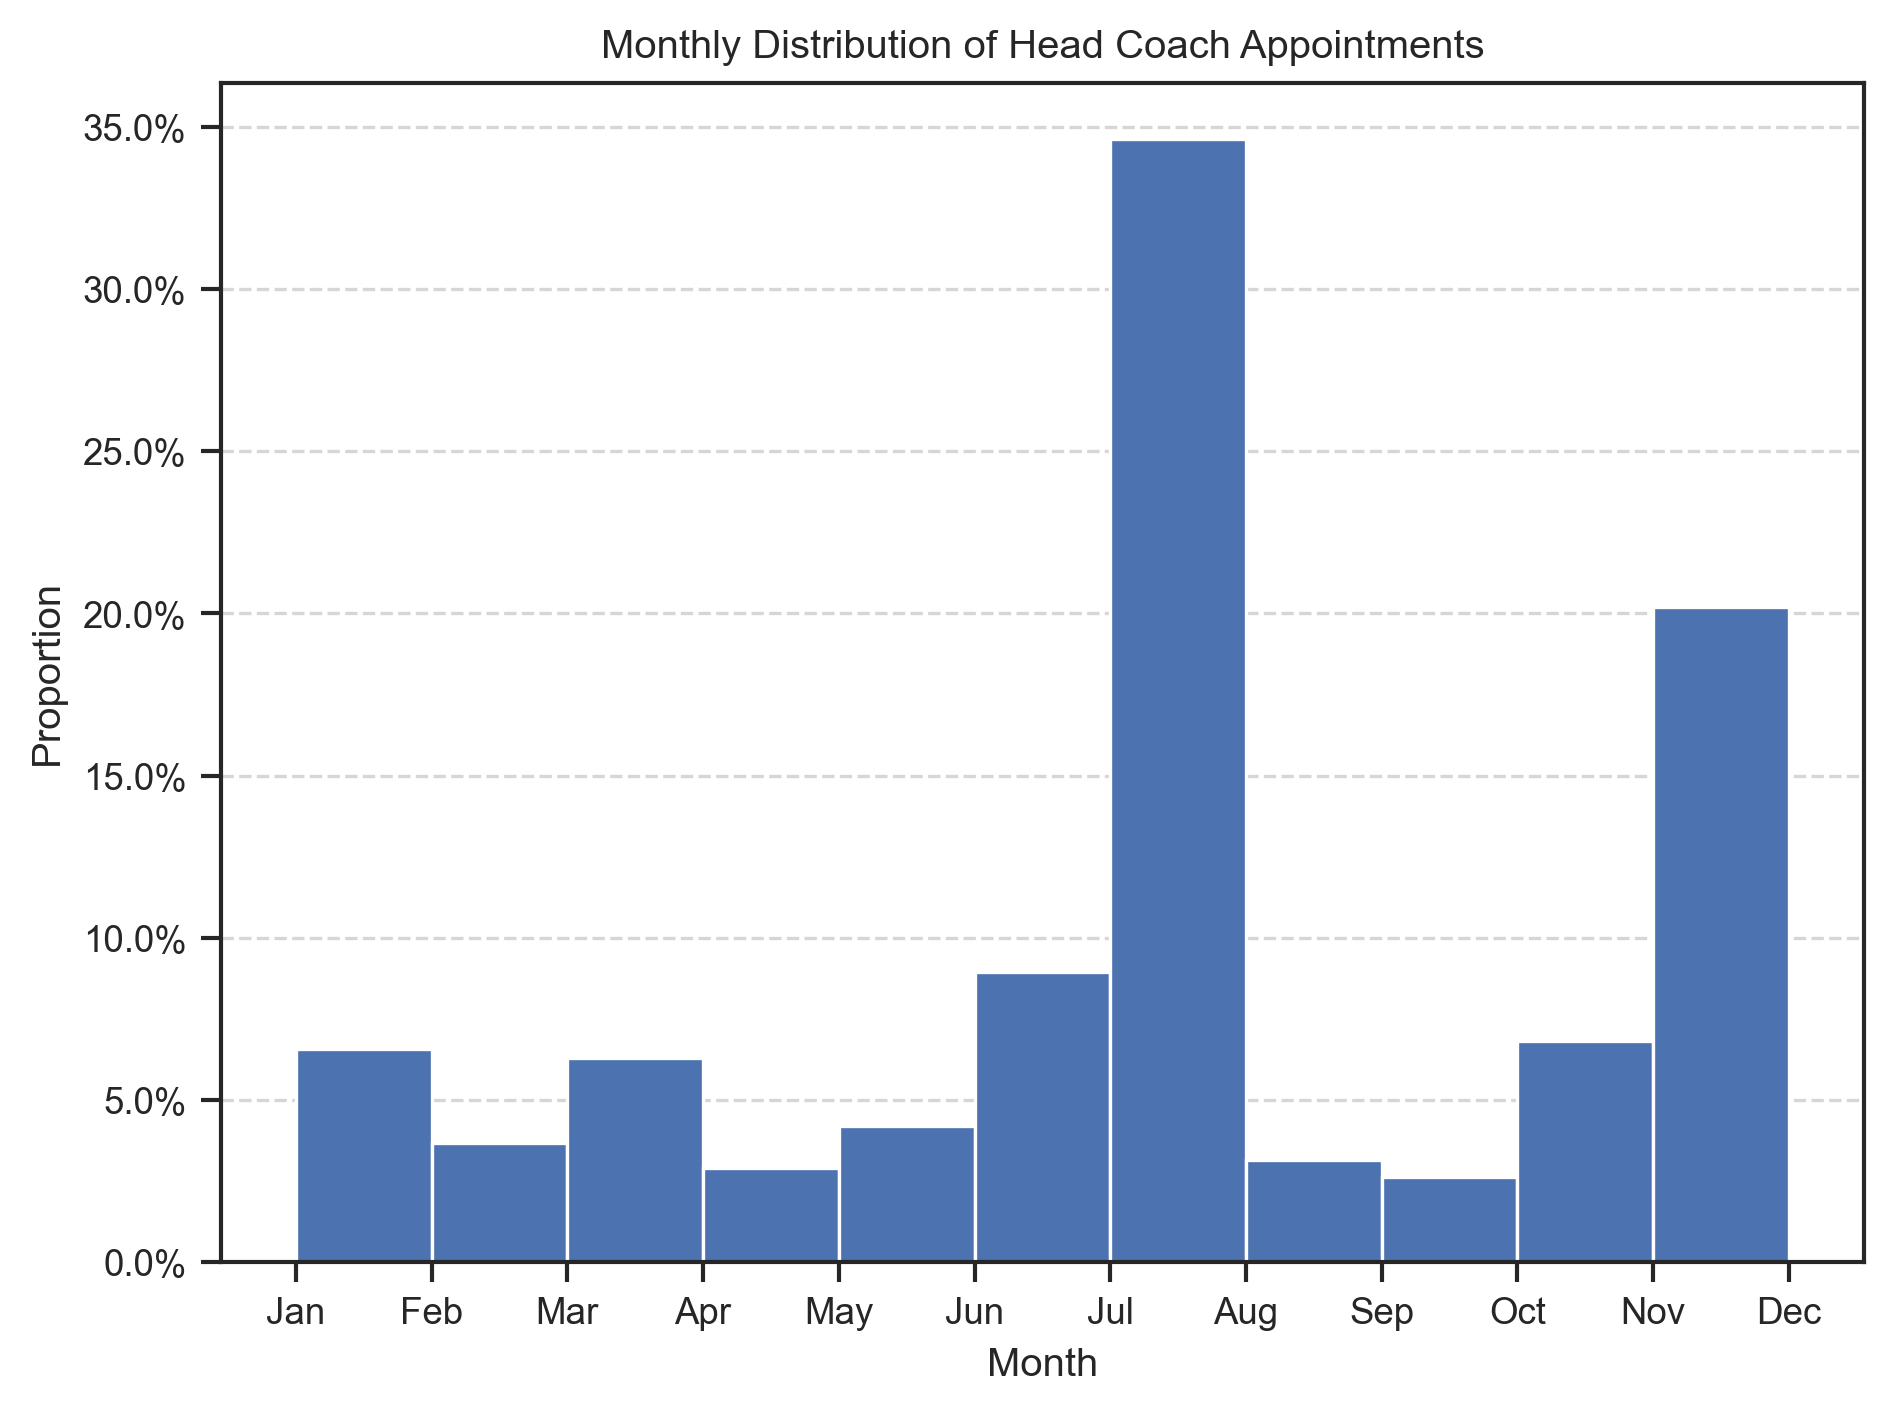

In [26]:
# | label: hc_appointment
plt.figure()
plt.grid(axis="y", linestyle="--", alpha=0.8)
sns.histplot(
    head_coach["Appointed"].dt.month,
    bins=11,
    color="b",
    kde=False,
    stat="density",
    alpha=1,
)
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.xticks(range(1, 13), months)
plt.title("Monthly Distribution of Head Coach Appointments")
plt.xlabel("Month")
plt.ylabel("Proportion")
plt.show()

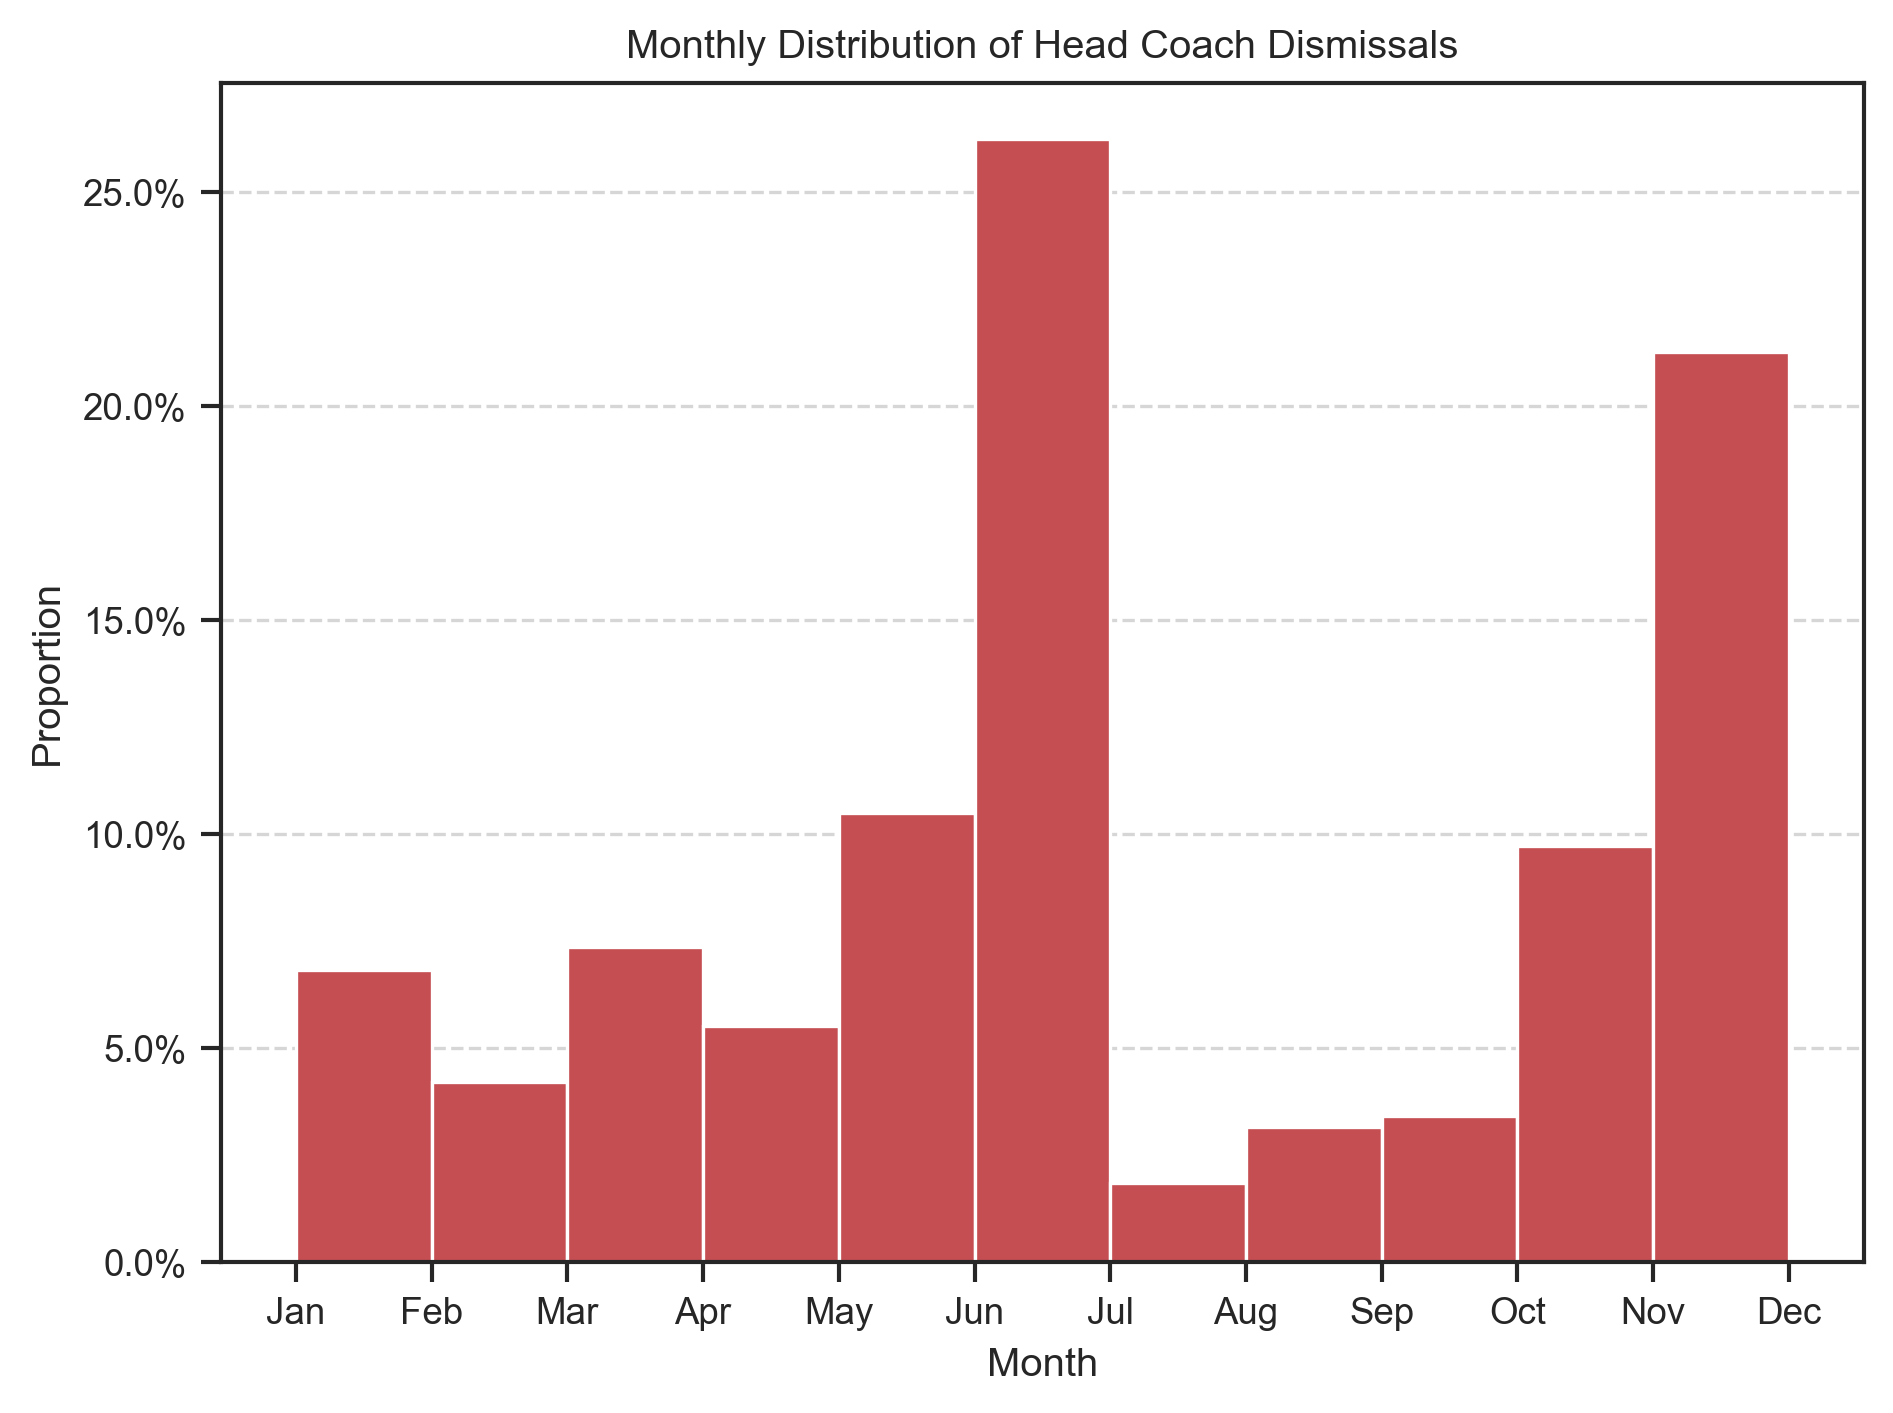

In [25]:
# | label: hc_dismissal
# Plot for Head Coach dismissal distribution
plt.grid(axis="y", linestyle="--", alpha=0.8)
sns.histplot(
    head_coach["EndDate"].dt.month,
    bins=11,
    color="r",
    kde=False,
    stat="density",
    alpha=1,
)
plt.xticks(range(1, 13), months)
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.title("Monthly Distribution of Head Coach Dismissals")
plt.xlabel("Month")
plt.ylabel("Proportion")
plt.show()

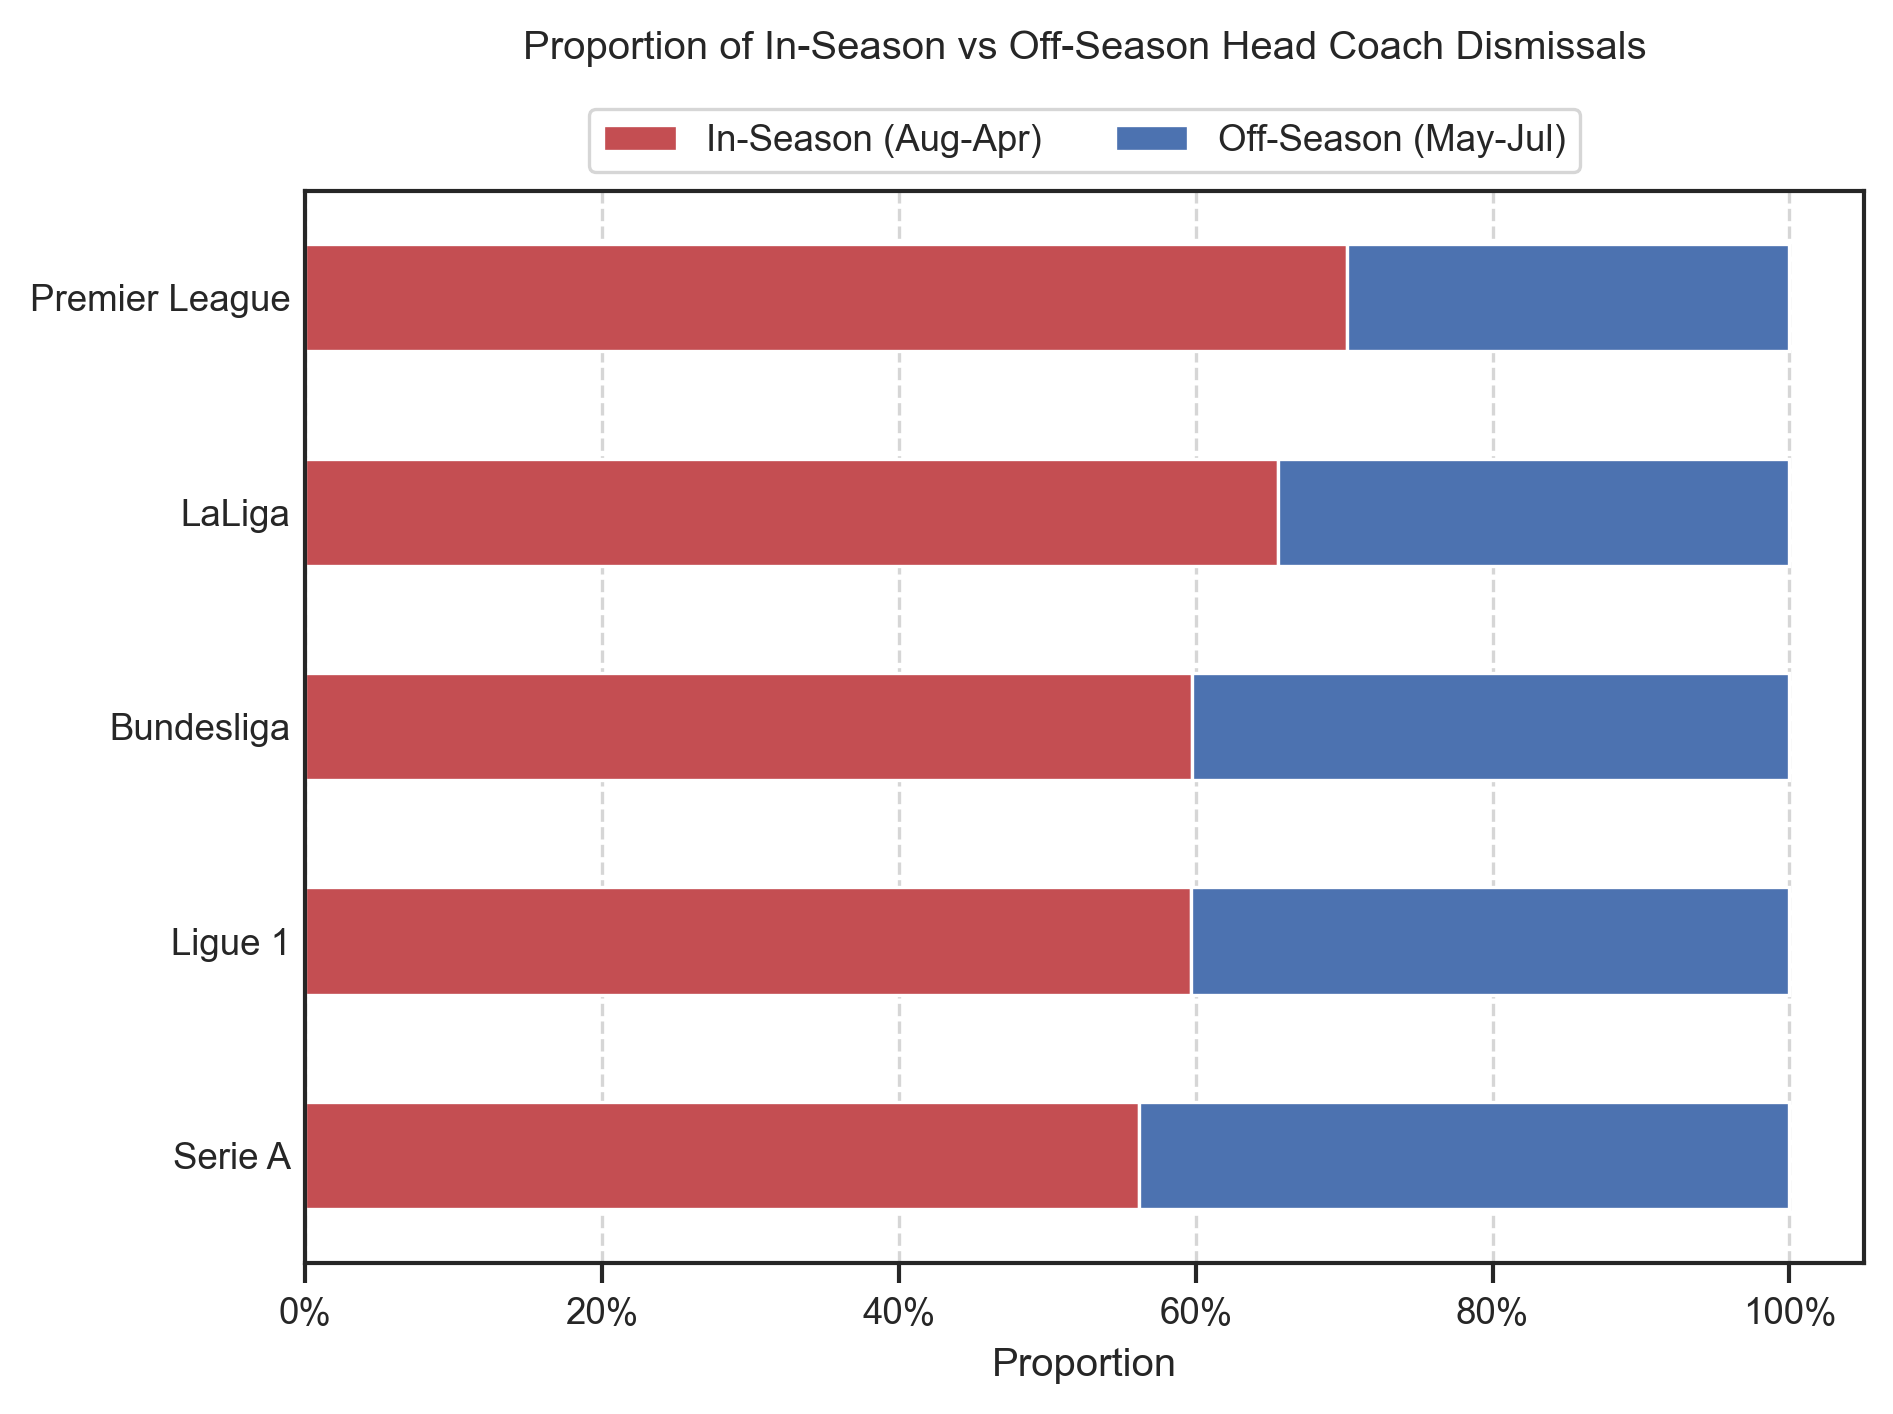

In [7]:
# | label: hc_season_break
# Proportion of in-season vs off-season head coach dismissal per league
head_coach_dismissed["OffSeason"] = head_coach_dismissed["EndDate"].dt.month.isin(
    [5, 6, 7]
)
season_break = (
    head_coach_dismissed.groupby(["League"])["OffSeason"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
season_break.columns = ["In-Season", "Off-Season"]
season_break = season_break.sort_values(by="Off-Season", ascending=False)
# plot season_break for each league
season_break.plot(kind="barh", stacked=True, color=["r", "b"])
plt.legend(
    labels=["In-Season (Aug-Apr)", "Off-Season (May-Jul)"],
    loc="lower center",
    bbox_to_anchor=(0.5, 1.0),
    ncol=2,
)
plt.gca().xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.tick_params(axis="y", which="both", length=0)
plt.title("Proportion of In-Season vs Off-Season Head Coach Dismissals", y=1.10)
plt.xlabel("Proportion")
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.8)

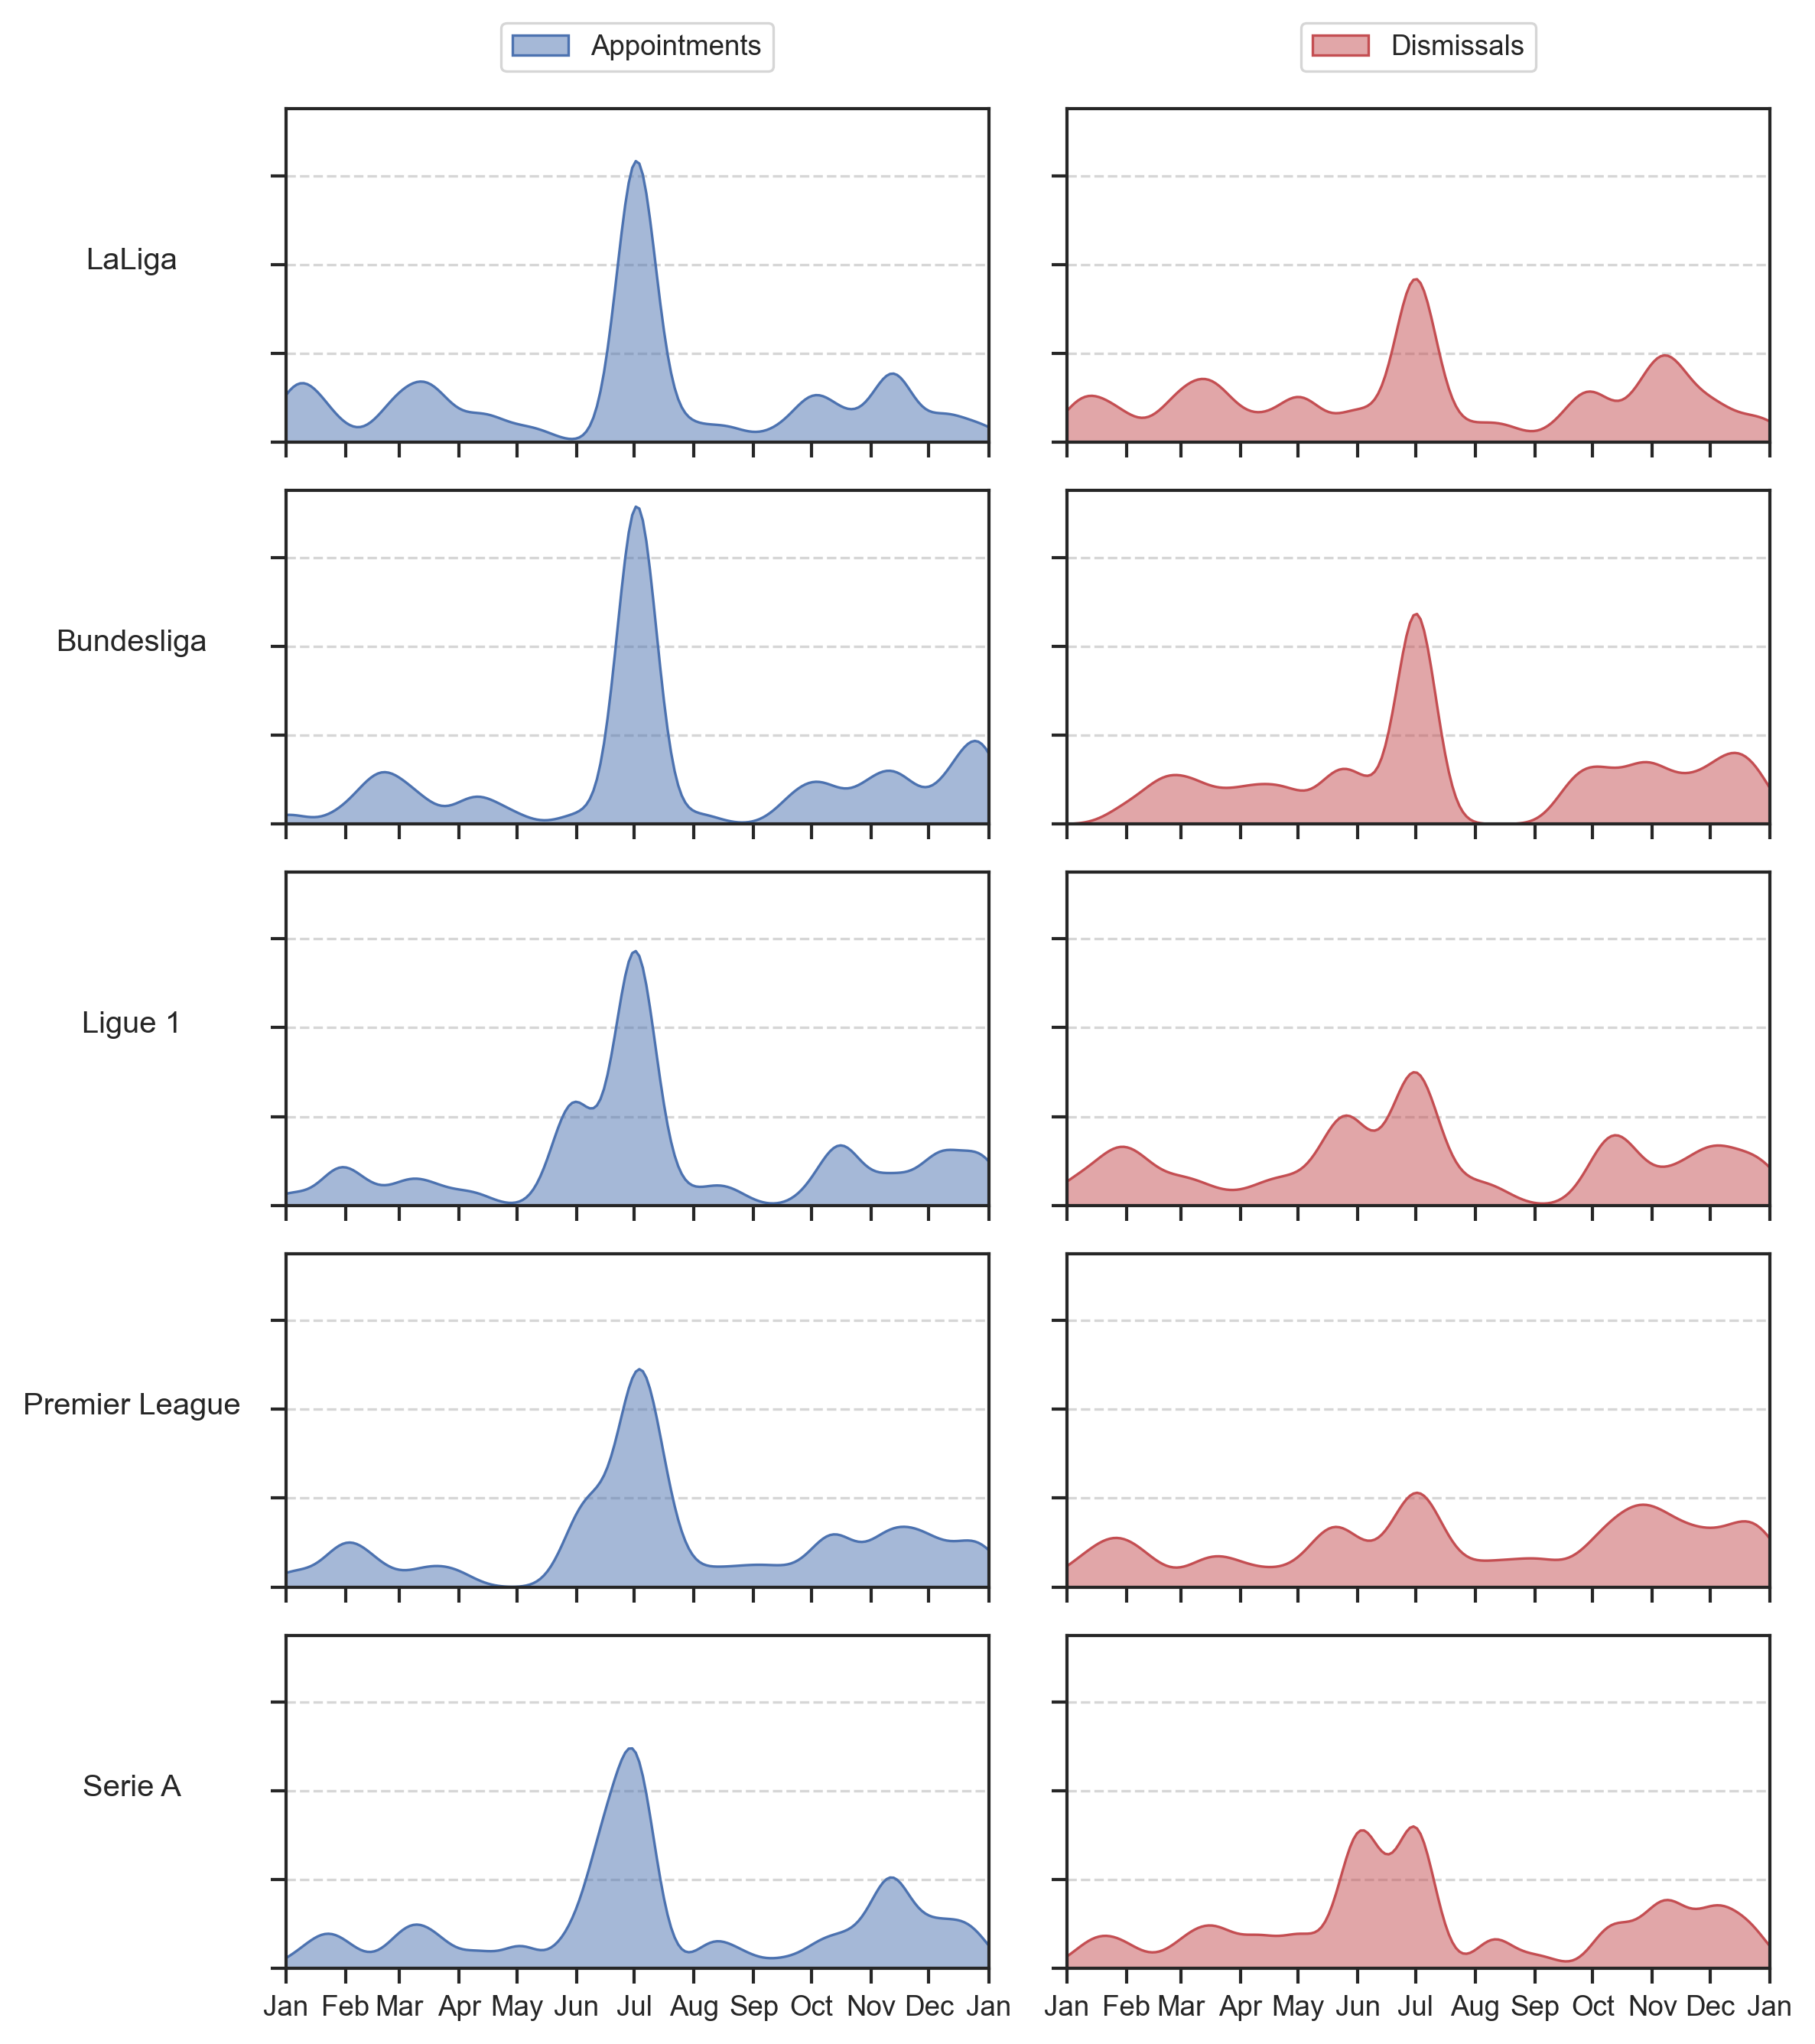

In [8]:
# | label: hc_replacement_per_club
head_coach["AppointedDay"] = head_coach["Appointed"].dt.dayofyear
head_coach_dismissed["DismissedDay"] = head_coach_dismissed["EndDate"].dt.dayofyear

# KDE Plot of head coach appointment/dismissed days of the year versus league
leagues = head_coach["League"].unique()
fig, ax = plt.subplots(
    len(leagues),
    2,
    figsize=(
        8,
        1.8 * len(leagues),
    ),
    sharex=True,
    sharey=True,
)

for i, league in enumerate(leagues):
    sns.kdeplot(
        data=head_coach[head_coach["League"] == league],
        x="AppointedDay",
        ax=ax[i, 0],
        fill=True,
        color="b",
        alpha=0.5,
        bw_adjust=0.25,
        clip=(0, 365),
        label="Appointments",
    )
    sns.kdeplot(
        data=head_coach_dismissed[head_coach_dismissed["League"] == league],
        x="DismissedDay",
        ax=ax[i, 1],
        fill=True,
        color="r",
        alpha=0.5,
        bw_adjust=0.25,
        clip=(0, 365),
        label="Dismissals",
    )
    ax[i, 0].set_xlim(0, 365)
    ax[i, 1].set_xlim(0, 365)
    # Major formatter for x-axis
    ax[i, 0].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i, 0].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[i, 1].xaxis.set_major_locator(mdates.MonthLocator())
    ax[i, 1].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    ax[i, 0].set_ylabel(league, rotation=0, labelpad=40)
    # Hide y-axis label and ticks
    ax[i, 0].set_yticklabels([])
    ax[i, 1].set_yticklabels([])
    # ax[i, 0].set_yticks([])
    # ax[i, 1].set_yticks([])
    ax[i, 0].grid(axis="y", linestyle="--", alpha=0.8)
    ax[i, 1].grid(axis="y", linestyle="--", alpha=0.8)
    # Remove x-axis label
    ax[i, 0].set_xlabel("")
    ax[i, 1].set_xlabel("")

    if i > 0:
        ax[i, 0].legend().remove()
        ax[i, 1].legend().remove()
    else:
        ax[i, 0].legend()
        ax[i, 1].legend()
        # Place each legend centered on top of their respective axes
        ax[i, 0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2)
        ax[i, 1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2)

Text(0.5, 0, 'Head Coaches tenure (days)')

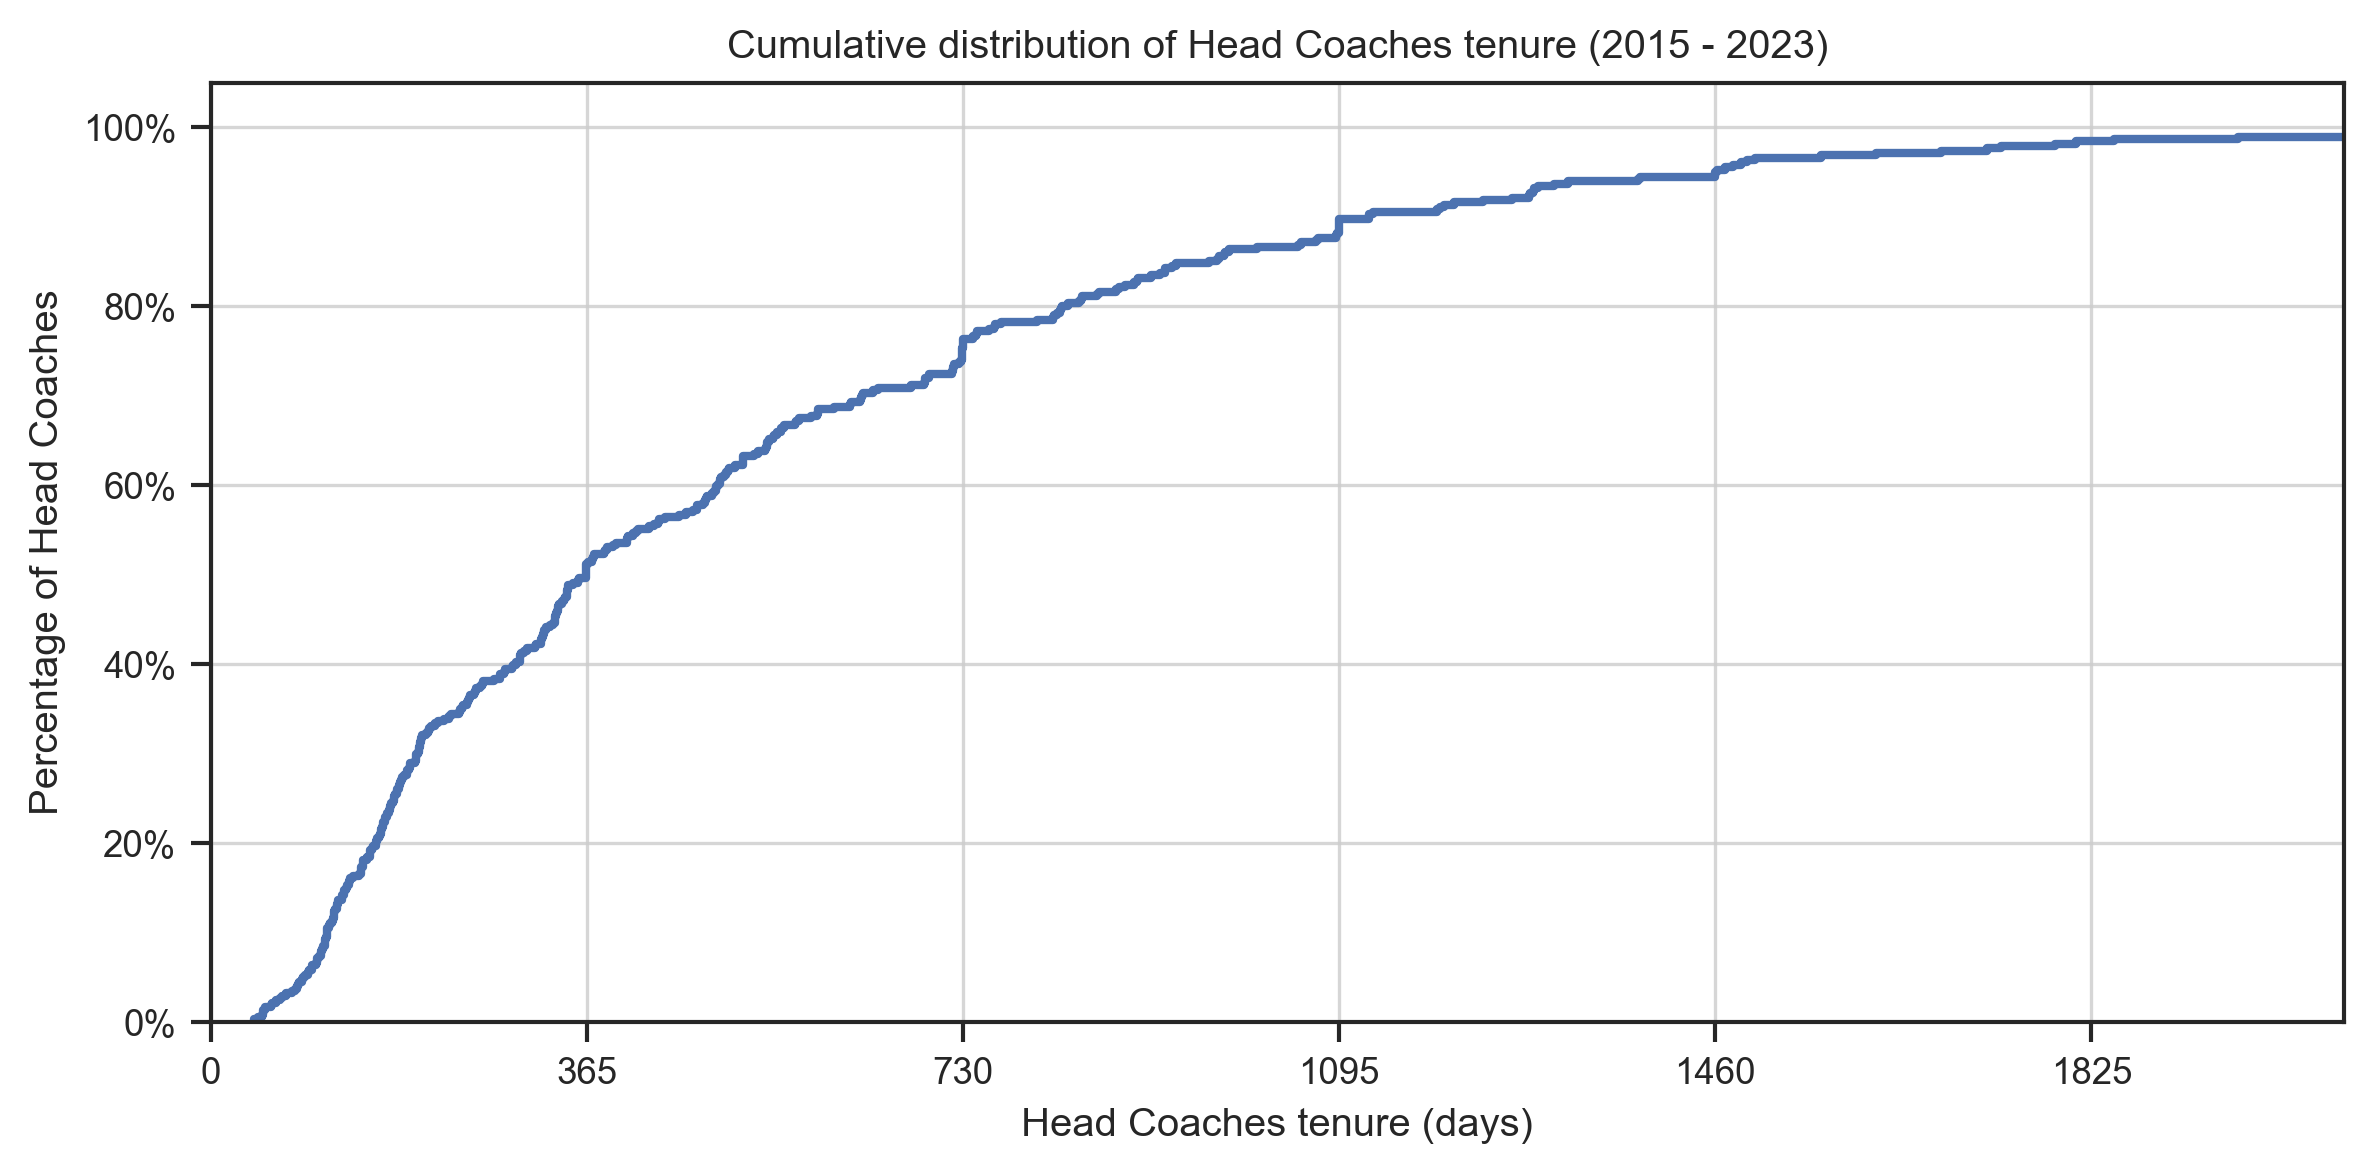

In [9]:
# | label: hc_tenure
# Plot ECDF of head_coach tenure
plt.figure(figsize=(8, 4))

sns.ecdfplot(
    data=head_coach_dismissed, x="Tenure", stat="percent", alpha=1, linewidth=2
)
plt.ylabel("Percentage of Head Coaches")
# Format percentage
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100))
# Grid
plt.grid(axis="y", linestyle="-", alpha=0.8)
plt.grid(axis="x", linestyle="-", alpha=0.8)
plt.xticks(range(0, max(head_coach_dismissed["Tenure"]) + 365, 365))
plt.xlim(0, head_coach_dismissed["Tenure"].quantile(0.99))
plt.title("Cumulative distribution of Head Coaches tenure (2015 - 2023)")
plt.xlabel("Head Coaches tenure (days)")

En moyenne, les entraîneurs sportifs sont restés en poste {eval}`round(head_coach_dismissed['Tenure'].mean())` jours.

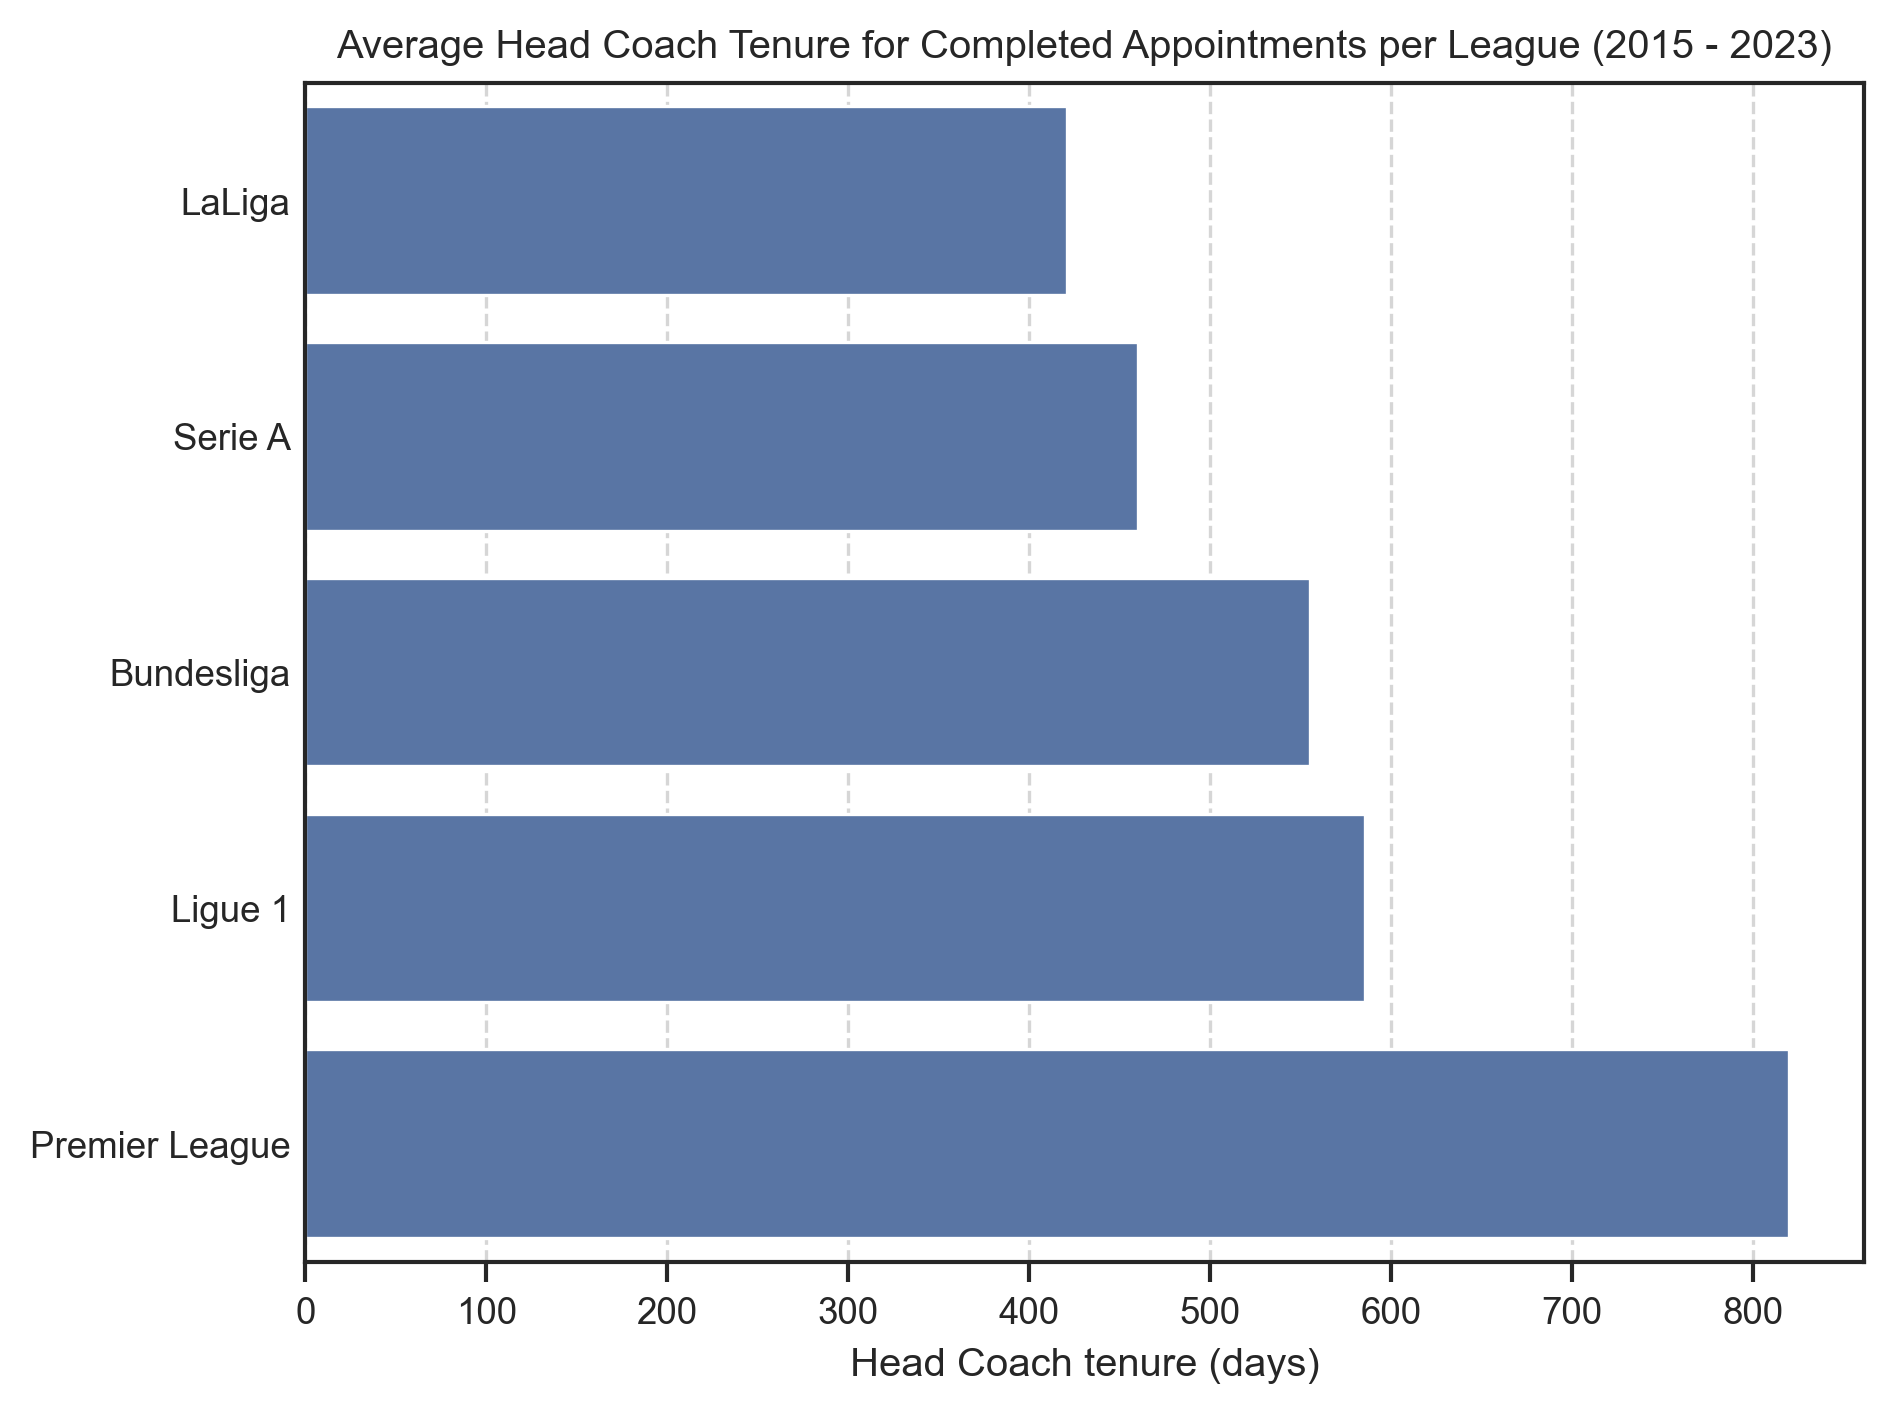

In [ ]:
# | label: hc_tenure_per_league
# Average days in post per league

# Calculate average days in post per league
avg_days_in_post = head_coach_dismissed.groupby("League")["Tenure"].mean()
avg_days_in_post = avg_days_in_post.sort_values()

# Plot average days in post per league
sns.barplot(y=avg_days_in_post.index, x=avg_days_in_post.values, orient="h")
plt.title(
    "Average Head Coach Tenure for Completed Appointments per League (2015 - 2023)"
)
plt.xlabel("Head Coach tenure (days)")
plt.tick_params(axis="y", which="both", length=0)
# Disable ylabel
plt.ylabel("")
plt.grid(axis="x", linestyle="--", alpha=0.8)

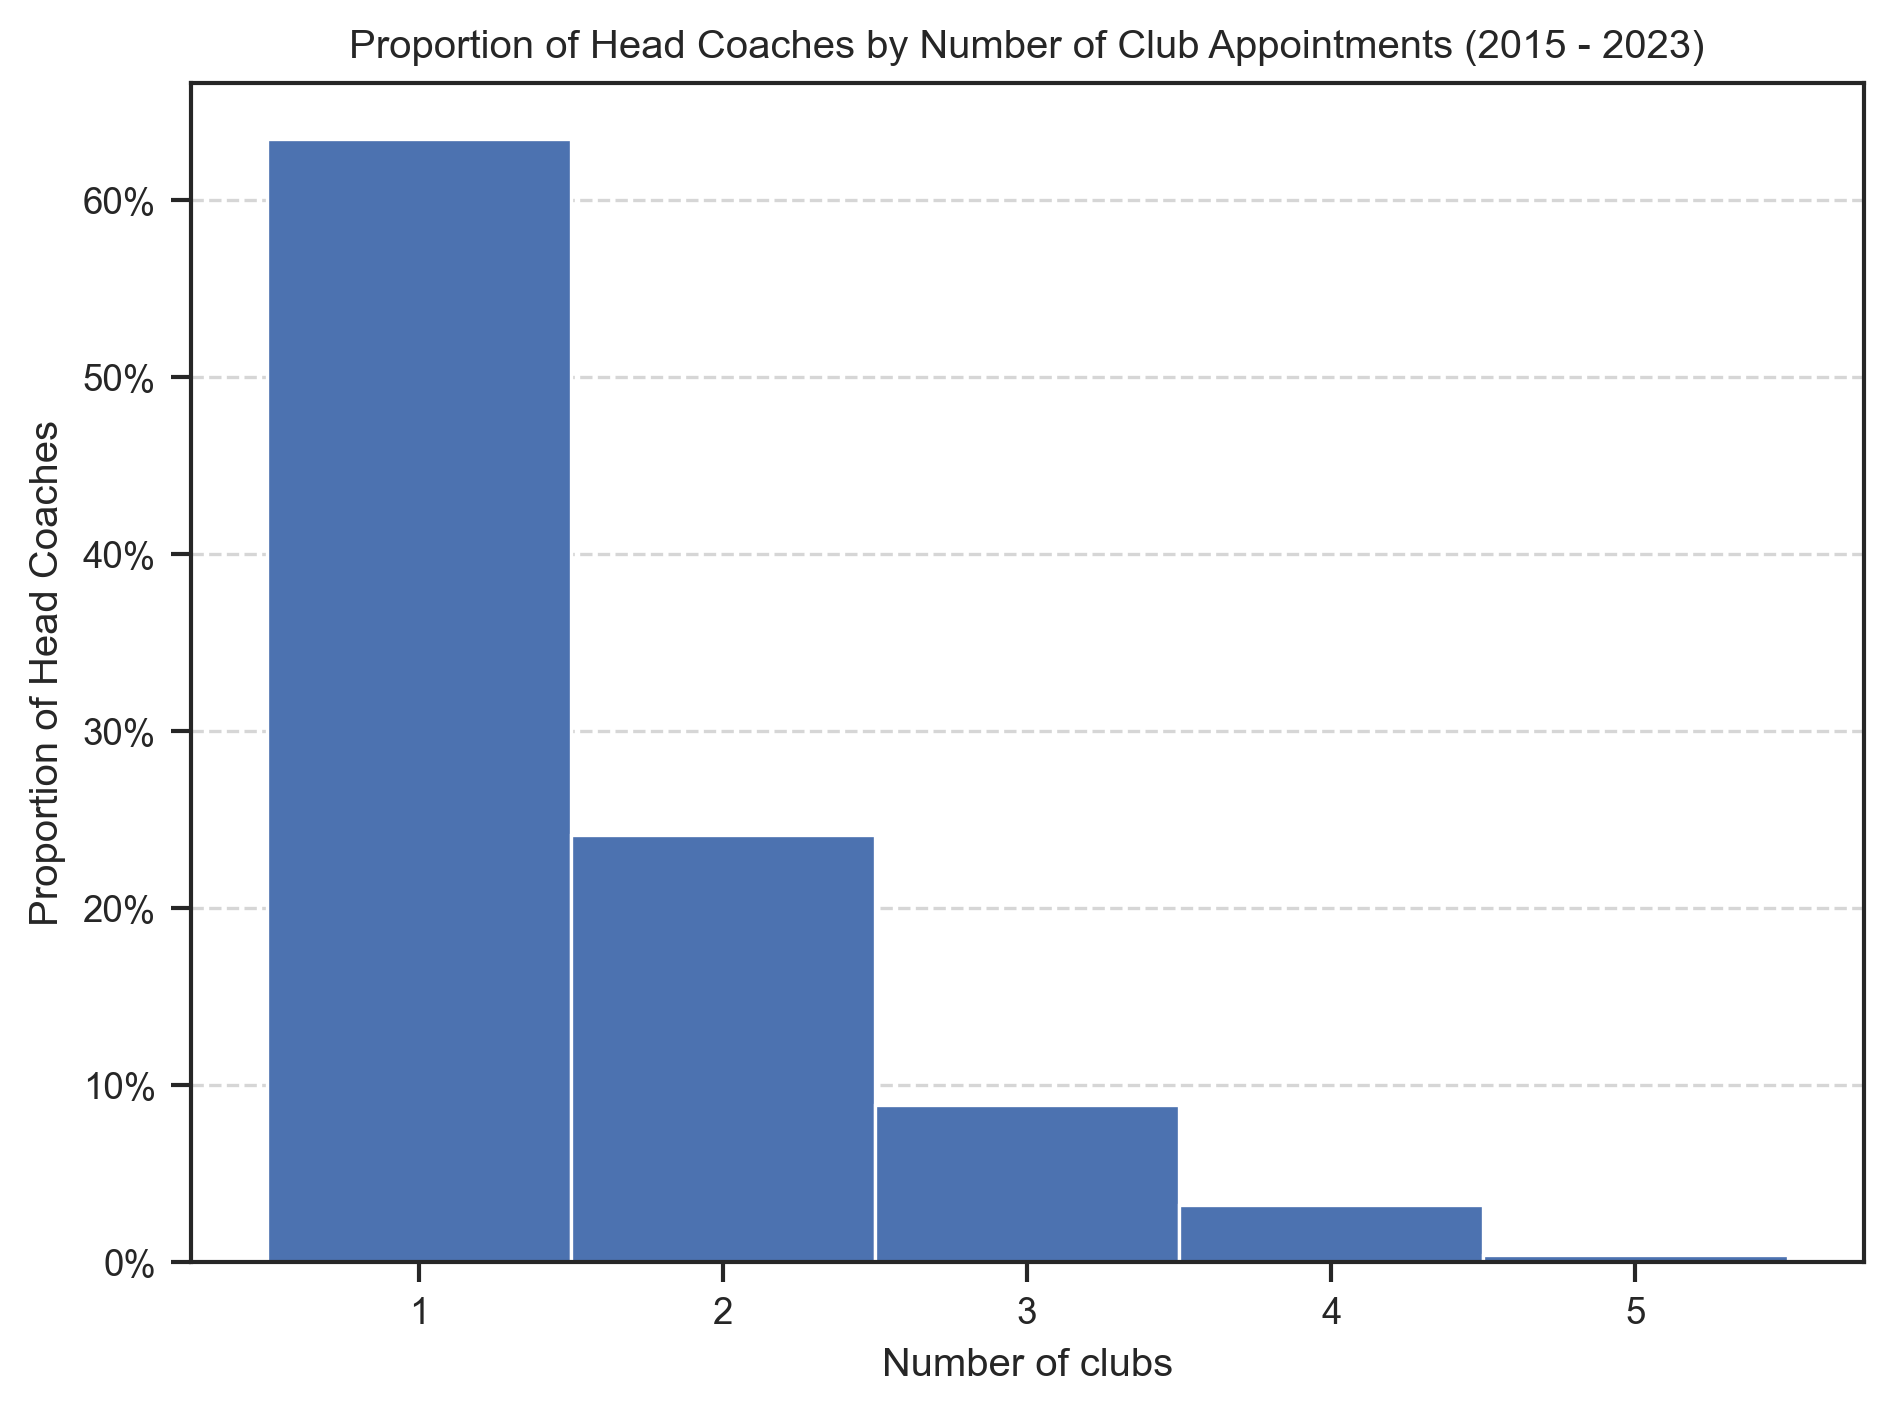

In [ ]:
# | label: club_per_hc
# Number of clubs per Head Coach

# Group by coach_name and count the number of clubs
club_per_coach = head_coach.groupby("HeadCoach").size().reset_index(name="count")

sns.histplot(x="count", data=club_per_coach, discrete=True, stat="probability", alpha=1)
plt.xticks(range(1, club_per_coach["count"].max() + 1))
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.title("Proportion of Head Coaches by Number of Club Appointments (2015 - 2023)")
plt.xlabel("Number of clubs")
plt.ylabel("Proportion of Head Coaches")
plt.grid(axis="y", linestyle="--", alpha=0.8)

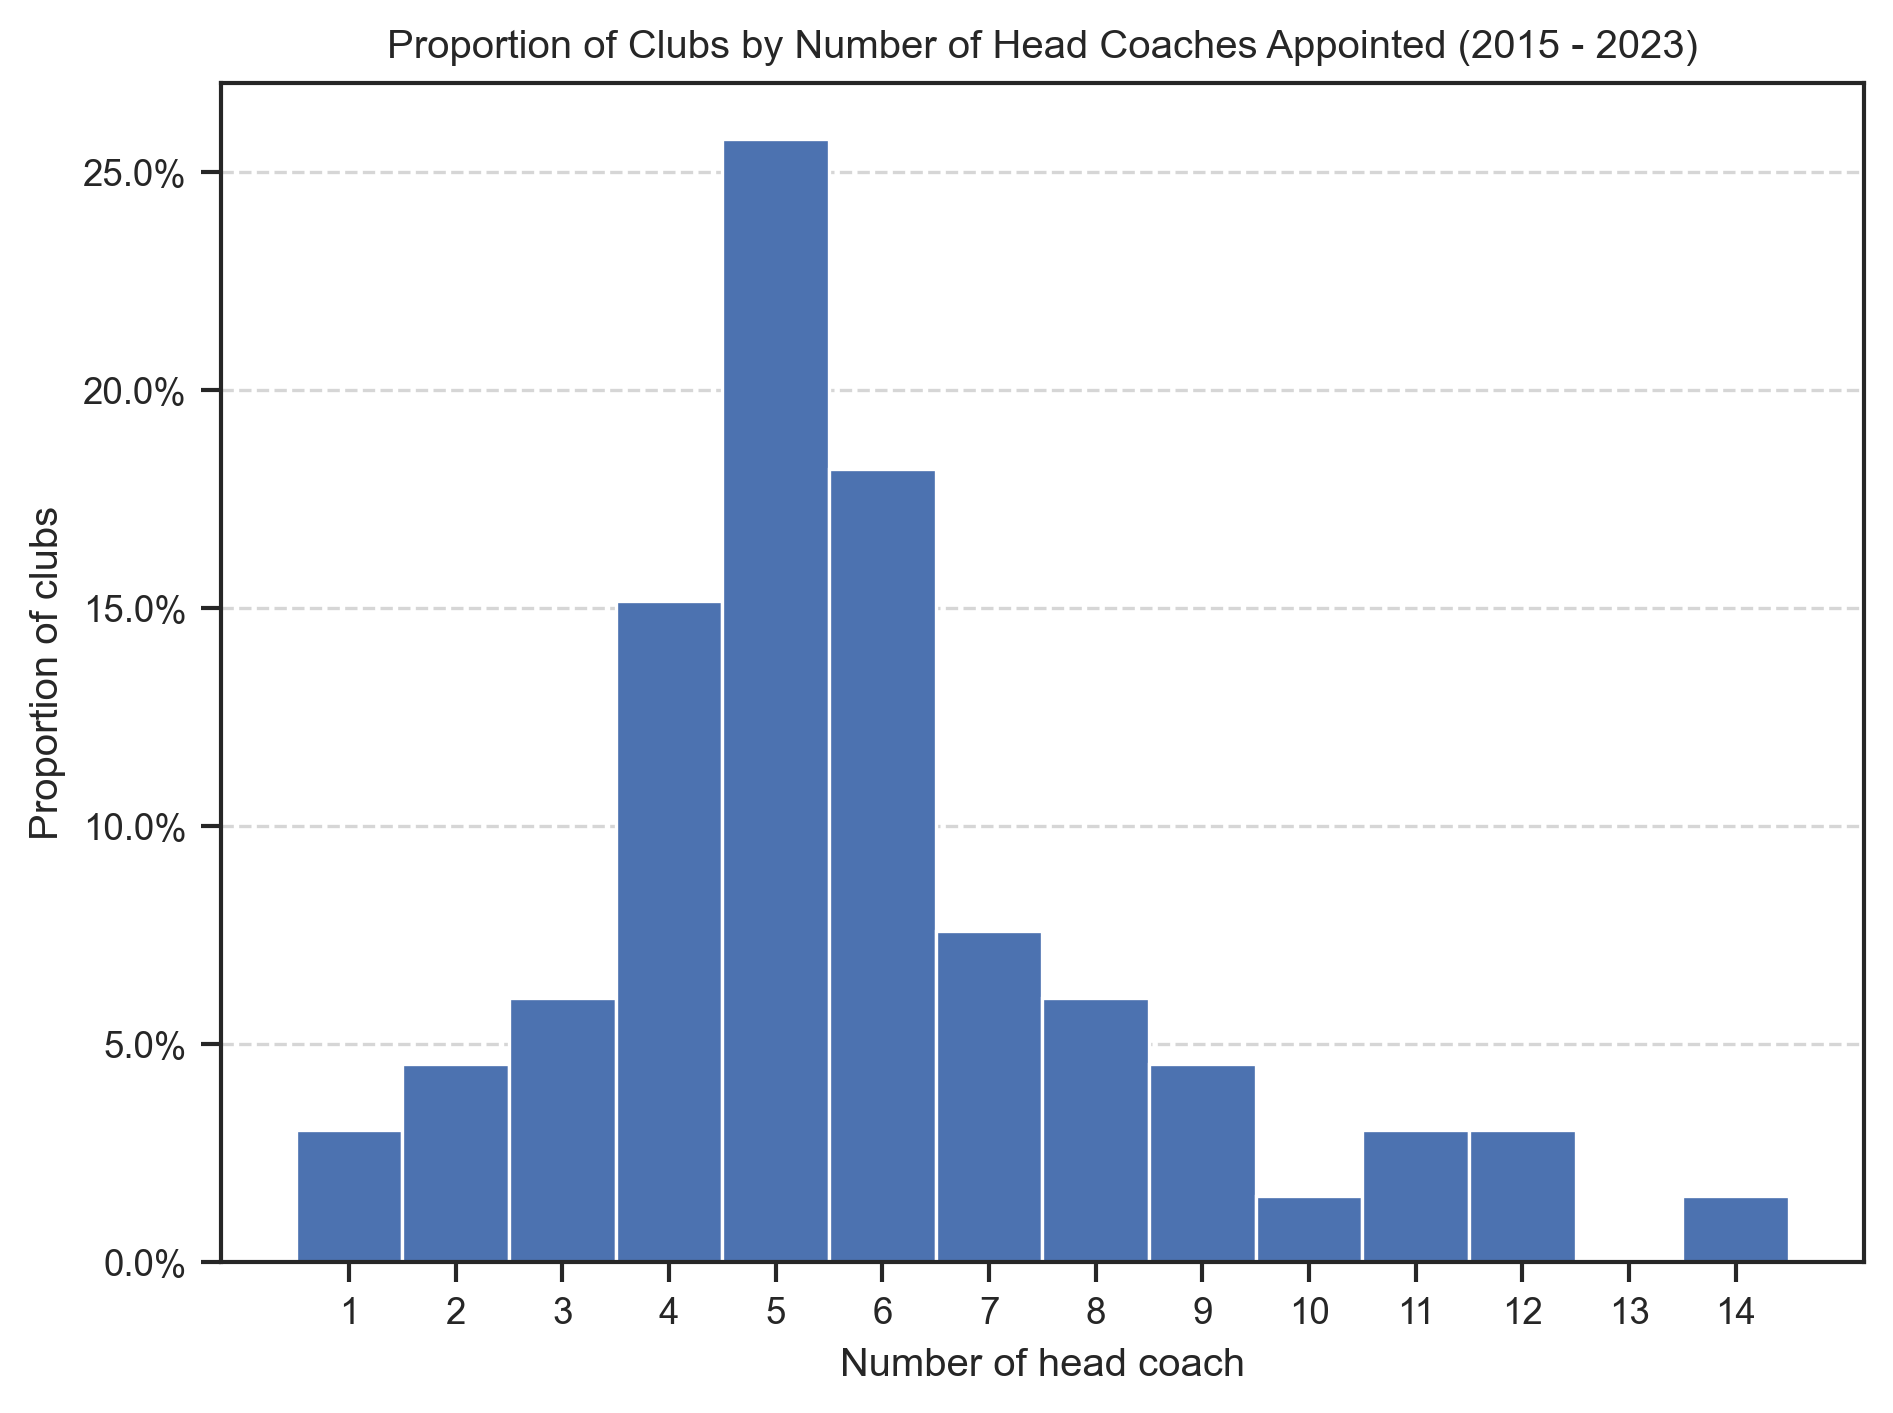

In [20]:
# | label: hc_per_club
# Number of Head Coachs per club

# Group by team and count the number of head coach
coach_per_club = head_coach.groupby("Team").size().reset_index(name="count")

sns.histplot(x="count", data=coach_per_club, discrete=True, stat="probability", alpha=1)
plt.xticks(range(1, coach_per_club["count"].max() + 1))
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.title(f"Proportion of Clubs by Number of Head Coaches Appointed (2015 - 2023)")
plt.xlabel("Number of head coach")
plt.ylabel("Proportion of clubs")
plt.grid(axis="y", linestyle="--", alpha=0.8)

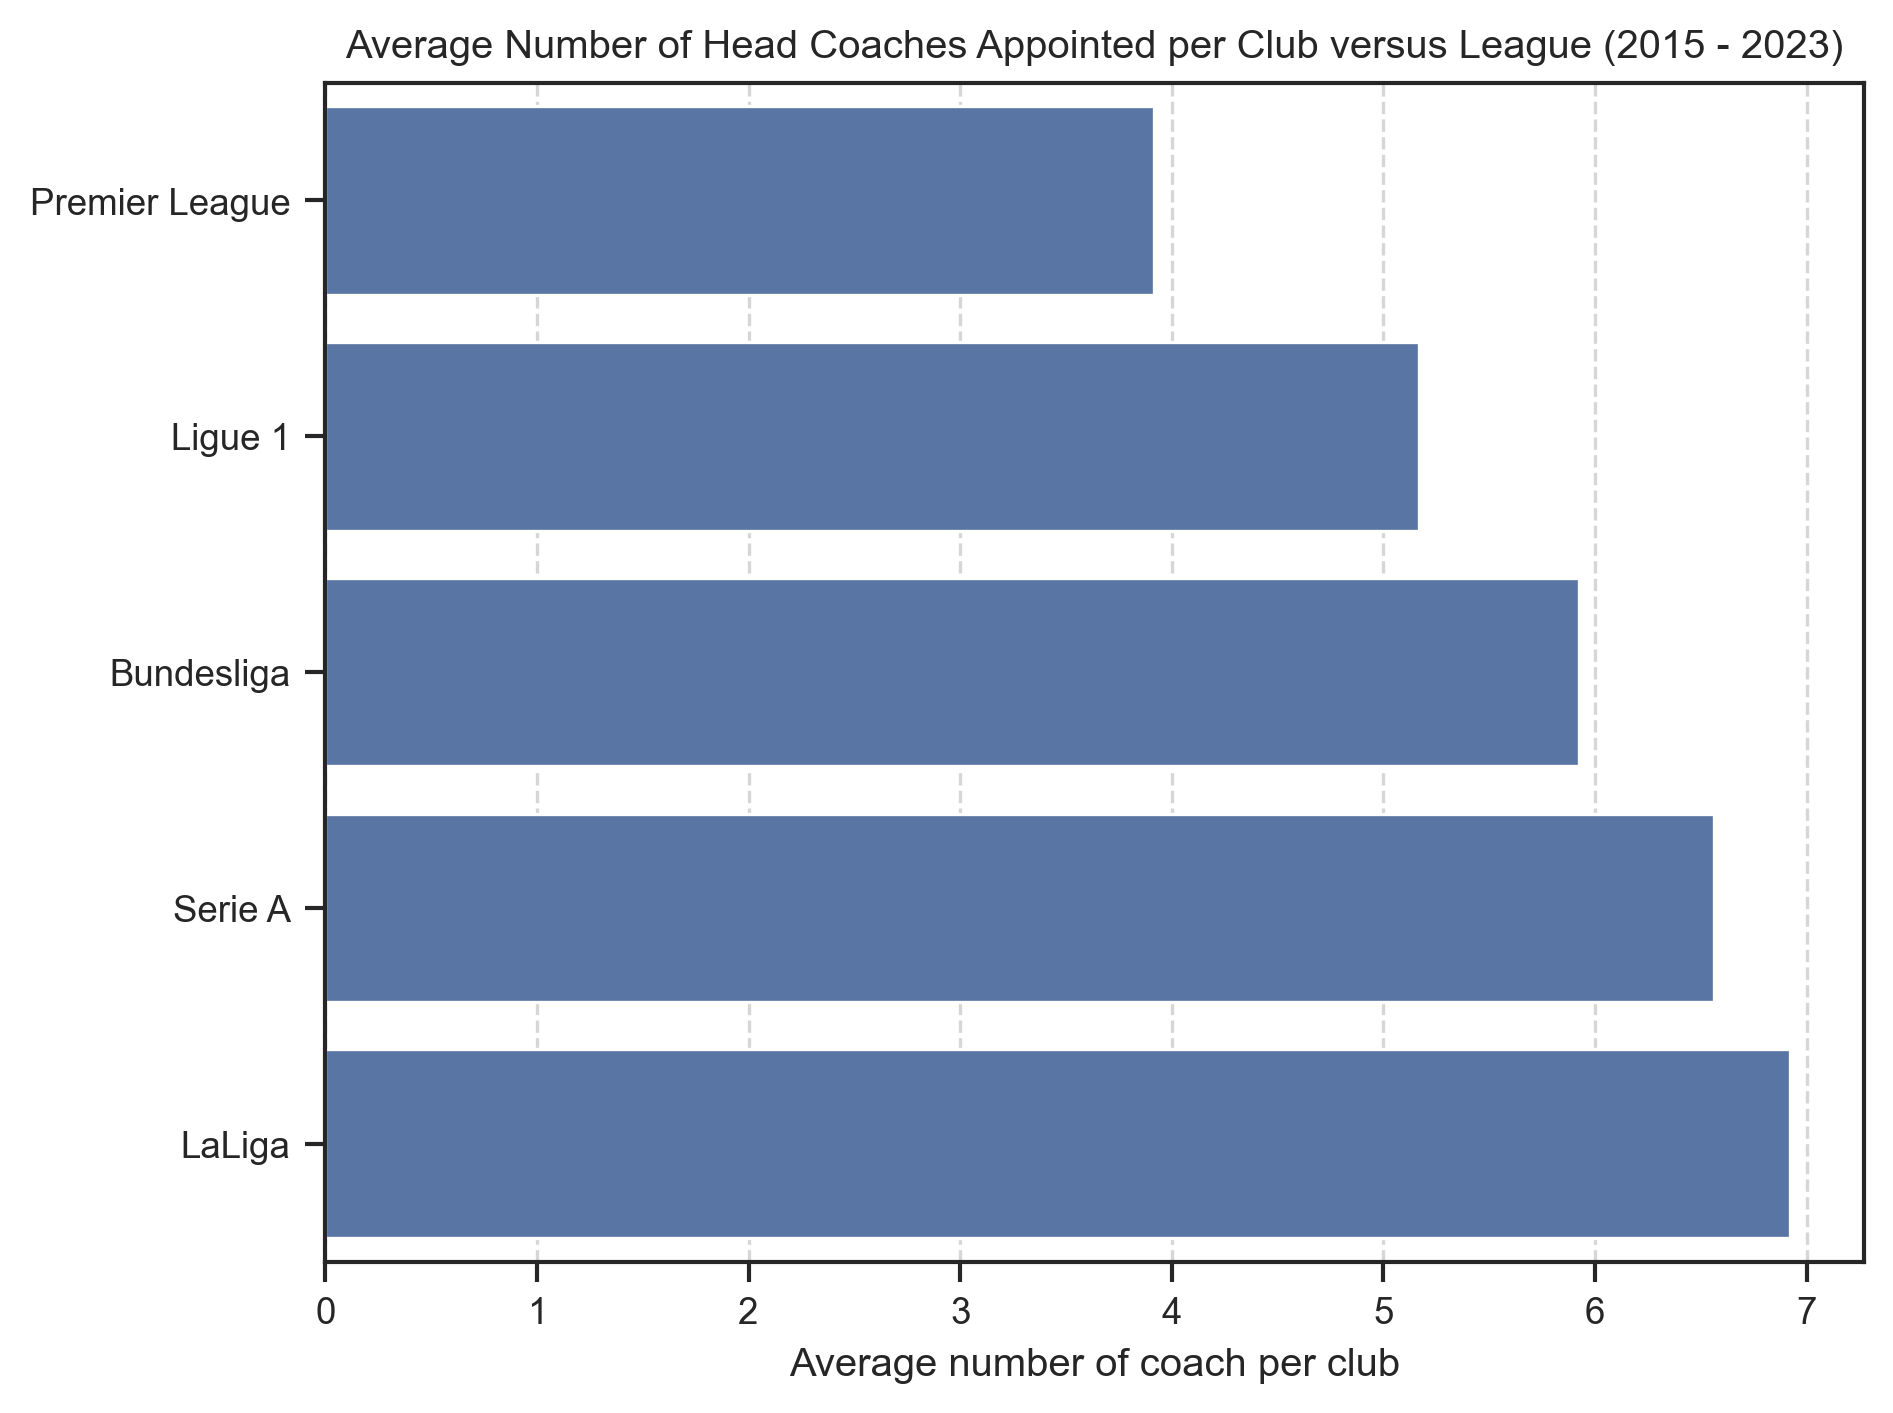

In [24]:
# | label: hc_per_club_per_league
# Average number of coach per club per league

# Calculate average number of coach per club per league
coach_per_team = head_coach.groupby(["League", "Team"]).size()
avg_number_of_coach_per_club_per_league = (
    coach_per_team.groupby("League").mean().sort_values()
)

# Plot average number of coach per club per league
sns.barplot(
    x=avg_number_of_coach_per_club_per_league.values,
    y=avg_number_of_coach_per_club_per_league.index,
    orient="h",
)
plt.title(
    "Average Number of Head Coaches Appointed per Club versus League (2015 - 2023)"
)
plt.ylabel("")
plt.xlabel("Average number of coach per club")
plt.grid(axis="x", linestyle="--", alpha=0.8)